X results:
mean: 2.815926721885855 
median 2.1009319537279603 
variance 5.486625165260806

Y results:
mean: 5.669880451614649 
median 5.811230907233362 
variance 4.9535506422725755

==============================LINEAR MODEL==============================

linear regression coefficients:
 [ 1.20430515 -0.10786197 -0.00279267 -0.33079551  0.00726027  0.30642761
 -0.03991688  0.02883497  0.01249586  0.00789131] 

mean absolute error: 0.8357112661297293
mean squared error: 1.117681445963192
root mean squared error: 1.0572045431056338


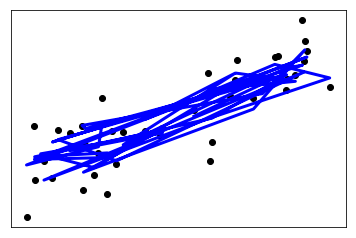

==============================LASSO REGULARIZATION==============================

lasso coefficients:
 [ 1.19495487 -0.         -0.         -0.          0.          0.28583794
 -0.01295475  0.          0.          0.        ]

mean squared error: 1.2982199665512077

==============================LINEAR MODEL USING SUBSET==============================

linear regression coefficients using subset:
 [ 1.2084202   0.31075862 -0.05086   ]

mean absolute error: 0.8274067175757931
mean squared error: 1.0533867821559098
root mean squared error: 1.0263463266149053


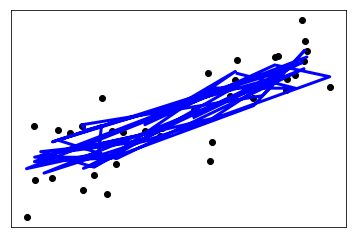


==============================CORRELATION COEFFICIENTS==============================
var 0:
 [[1.         0.79974244]
 [0.79974244 1.        ]] 

var 1:
 [[1.         0.01755058]
 [0.01755058 1.        ]] 

var 2:
 [[1.         0.14621518]
 [0.14621518 1.        ]] 

var 3:
 [[ 1.         -0.13416527]
 [-0.13416527  1.        ]] 

var 4:
 [[1.         0.05307599]
 [0.05307599 1.        ]] 

var 5:
 [[1.         0.28879372]
 [0.28879372 1.        ]] 

var 6:
 [[ 1.         -0.14719628]
 [-0.14719628  1.        ]] 

var 7:
 [[ 1.         -0.03422257]
 [-0.03422257  1.        ]] 

var 8:
 [[1.         0.08719808]
 [0.08719808 1.        ]] 

var 9:
 [[ 1.00000000e+00 -9.70431659e-05]
 [-9.70431659e-05  1.00000000e+00]] 



In [64]:
# Victoria Rhine - problem set 6
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

# import data
data = np.load('rdata1.npy')

# convert numpy array to pandas dataframe
dataset = pd.DataFrame(data)

# divide data into attributes and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

# problem 1
# mean, median, variable for X and Y
X_mean = np.mean(X)
X_median = np.median(X)
X_var = np.var(X)

Y_mean = np.mean(y)
Y_median = np.median(y)
Y_var = np.var(y)

# print results
print("X results:\nmean:", X_mean, "\nmedian", X_median, "\nvariance", X_var)
print("\nY results:\nmean:", Y_mean, "\nmedian", Y_median, "\nvariance", Y_var)

print("\n==============================LINEAR MODEL==============================")

# problems 2 and 3
# divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# train algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# see which coefficients regression model has chosen
print("\nlinear regression coefficients:\n", regressor.coef_, "\n")

# the results show variable 0 has a significant 
# effect with an increase of 1.20430515 and variable 5 is significient 

# make predictions on test data
y_pred = regressor.predict(X_test)

# evaluate performance of algorithm
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# plot outputs
plt.scatter(X_test[:,0], y_test,  color = 'black')
plt.plot(X_test[:,0], y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

# run lasso model and test different alpha settings
# i started with 0.001 and increased by 0.001 until
# i received results that made the most sense

print("==============================LASSO REGULARIZATION==============================")

# problem 4
lasso = Lasso(normalize = True, alpha = 0.005)
lasso.fit(X,y)

print("\nlasso coefficients:\n", lasso.coef_)
print('\nmean squared error:', metrics.mean_squared_error(y_true = y, y_pred = lasso.predict(X)))

# as i increased alpha, mean squared error increased slightly
# and it appears the predictor coefficients that turn zero
# are the ones that appeared most significant in the previous model

print("\n==============================LINEAR MODEL USING SUBSET==============================")

# problem 5 
# subset of independent variables based on previous findings
sub_var = X[:, [0,5,6]]

# divide data into training and test sets
sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(sub_var, y, test_size = 0.2, random_state = 0)

# train algorithm
sub_regressor = LinearRegression()
sub_regressor.fit(sub_X_train, sub_y_train)

# see which coefficients regression model has chosen
print("\nlinear regression coefficients using subset:\n", sub_regressor.coef_)

# make predictions on test data
sub_y_pred = sub_regressor.predict(sub_X_test)

# evaluate performance of algorithm
print('\nmean absolute error:', metrics.mean_absolute_error(sub_y_test, sub_y_pred))
print('mean squared error:', metrics.mean_squared_error(sub_y_test, sub_y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(sub_y_test, sub_y_pred)))

# plot outputs
plt.scatter(sub_X_test[:,0], sub_y_test,  color='black')
plt.plot(sub_X_test[:,0], sub_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# the mean squared error is 1.05338678215591 which is a better 
# result than the original model which produced 1.1176814459631927
# and better than the regularized model which produced 1.2982199665512077
# because insignificant variables are now removed

print("\n==============================CORRELATION COEFFICIENTS==============================")

# problem 6
# correlation coefficients for all variables and y
print("var 0:\n", np.corrcoef(X[:,0], y), "\n")
print("var 1:\n", np.corrcoef(X[:,1], y), "\n")
print("var 2:\n", np.corrcoef(X[:,2], y), "\n")
print("var 3:\n", np.corrcoef(X[:,3], y), "\n")
print("var 4:\n", np.corrcoef(X[:,4], y), "\n")
print("var 5:\n", np.corrcoef(X[:,5], y), "\n")
print("var 6:\n", np.corrcoef(X[:,6], y), "\n")
print("var 7:\n", np.corrcoef(X[:,7], y), "\n")
print("var 8:\n", np.corrcoef(X[:,8], y), "\n")
print("var 9:\n", np.corrcoef(X[:,9], y), "\n")

# the selections i have in problem 3:
# "the results show variable 0 has a significant 
# effect with an increase of 1.20430515 and variable 5 is significient"
# the results do show that variable 0 has a strong correlation with ~0.7997
# and variable 5 has a strong correlation with ~0.2887 and those variables
# are also two of the variables that made it into the subset after
# lasso regularization was applied to the data